# Applying Yields and Resolutions

This notebook serves two purposes. The first is to act as a test; you should be able to roughly reproduce the below graphic by running this notebook. The second is to serve as an example usecase. Below, we want to emulate a detector that we know follows either the Lindhard or Sorenson model for ionization energy and has a resolution that affects where the data lands; we are able to apply both the yields and resolutions to the data in order to get a more realistic model for the detector's output.

![SorVsLin.svg](SorVsLin.svg)

## Generating a \*.root file for this notebook
In the top-level nrCascadeSim directory, after compiling (and activating any necessary environments if applicable), run:
``` 
./realizeCascades -n 10000 -o test-example/data/file.root levelfiles/Si28_ngam_all_cascades.txt
```


## Notes

You may encounter some runtime warnings - these are expected.  
If you have a \*.root file you want to call saved to a different location than mentioned in the instructions above, be sure to change line 21 to point to the correct location.  
Please allow sufficient time to run this notebook; for very large root files it could take up to an hour.

In [1]:
#Import Libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.style.use('standard.mplstyle')
from matplotlib.lines import Line2D
#Custom libraries
import sys
sys.path.append('./python')
import nc_kinematics as nck
import lindhard as lin
import R68_yield as R68y
from hist import histogramable as h

#Build stuff!

#Select a file.
file = './data/file.root'

real_Lind = np.ndarray.flatten(np.asarray(h(file)[0]))
real_Sor = np.ndarray.flatten(np.asarray(h(file,model='Sorenson')[0]))
small_Lind = np.ndarray.flatten(np.asarray(h(file,scalefactor=0.2)[0]))
small_Sor = np.ndarray.flatten(np.asarray(h(file,model='Sorenson',scalefactor=0.2)[0]))

real_Lind = real_Lind[real_Lind >= 0]
real_Sor = real_Sor[real_Sor >= 0]
small_Lind = small_Lind[small_Lind >= 0]
small_Sor = small_Sor[small_Sor >= 0]

#From https://stackoverflow.com/questions/31517156/adjust-exponent-text-after-setting-scientific-limits-on-matplotlib-axis

def format_exponent(ax, axis='y'):

    # Change the ticklabel format to scientific format
    ax.ticklabel_format(axis=axis, style='sci', scilimits=(-2, 2))

    # Get the appropriate axis
    if axis == 'y':
        ax_axis = ax.yaxis
        x_pos = 0.0
        y_pos = 1.0
        horizontalalignment='left'
        verticalalignment='bottom'
    else:
        ax_axis = ax.xaxis
        x_pos = 1.0
        y_pos = -0.05
        horizontalalignment='right'
        verticalalignment='top'

    # Run plt.tight_layout() because otherwise the offset text doesn't update
    plt.tight_layout()

    # Get the offset value
    offset = ax_axis.get_offset_text().get_text()

    if len(offset) > 0:
        # Get that exponent value and change it into latex format
        minus_sign = u'\u2212'
        expo = np.float(offset.replace(minus_sign, '-').split('e')[-1])
        offset_text = r'x$\mathregular{10^{%d}}$' %expo

        # Turn off the offset text that's calculated automatically
        ax_axis.offsetText.set_visible(False)

        # Add in a text box at the top of the y axis
        ax.text(x_pos, y_pos, offset_text, transform=ax.transAxes,
               horizontalalignment=horizontalalignment,
               verticalalignment=verticalalignment,fontsize=30)
    return ax

dict_keys(['xx', 'yy', 'ex', 'ey'])
ipykernel_launcher:27: RuntimeWarning: invalid value encountered in greater_equal
ipykernel_launcher:28: RuntimeWarning: invalid value encountered in greater_equal
ipykernel_launcher:29: RuntimeWarning: invalid value encountered in greater_equal
ipykernel_launcher:30: RuntimeWarning: invalid value encountered in greater_equal


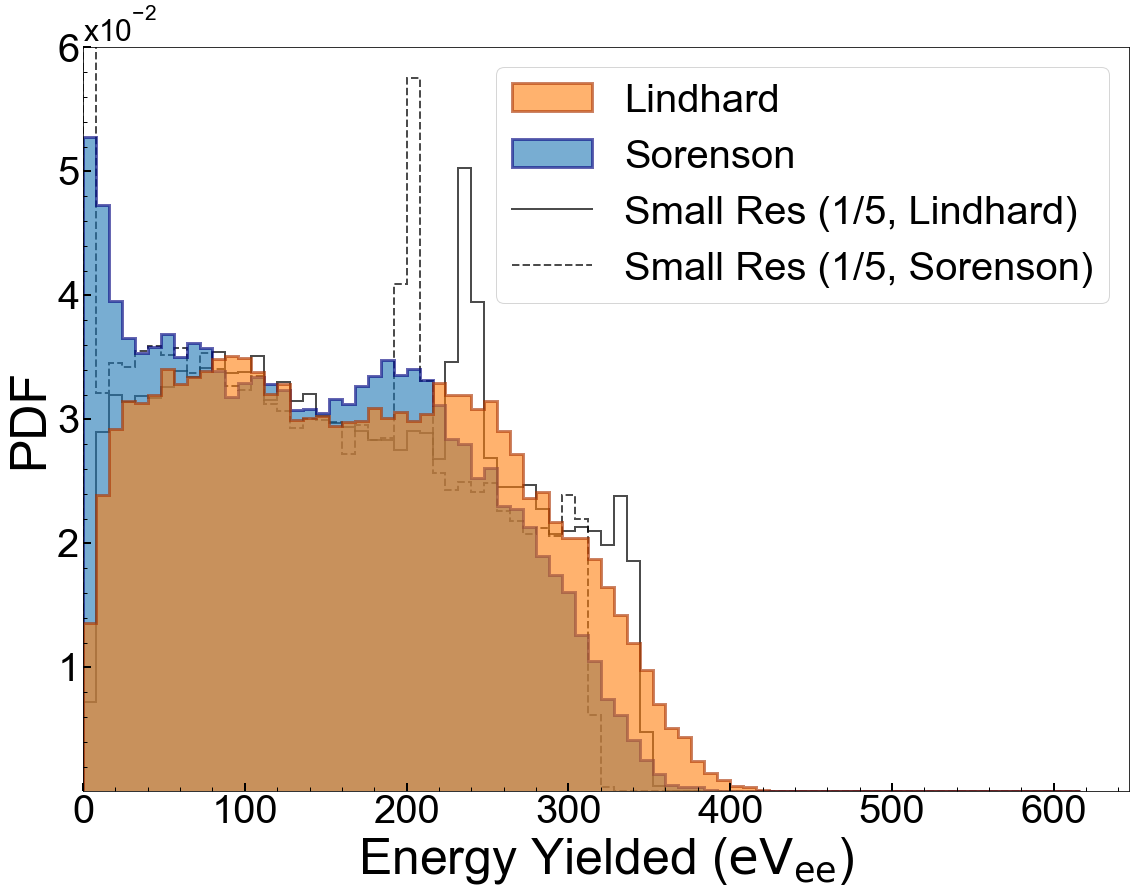

In [2]:
fig, ax = plt.subplots(figsize=(16,12))

binsize = 8 #bin width in eVee
bins = np.arange(0,620,binsize)

plt.hist(small_Lind,alpha=0.7,label='Small Res (1/5, Lindhard)',histtype='step',edgecolor='black',density='True',linewidth=2,bins=bins)
plt.hist(small_Sor,alpha=0.7,label='Small Res (1/5, Sorenson)',histtype='step',edgecolor='black',linestyle='--',density='True',linewidth=2,bins=bins)
plt.hist(real_Sor,alpha=0.6,label='Sorenson',histtype='step',fill=True,density='True',bins=bins,linewidth=3,edgecolor='navy',color='C0')
plt.hist(real_Lind,alpha=0.6,label='Lindhard',histtype='step',fill=True,density='True',bins=bins,linewidth=3,edgecolor='#a30',color='C1')

plt.xlabel(r"Energy Yielded ($\mathrm{eV}_{\mathrm{ee}}$)",fontsize=50)
plt.ylabel("PDF",fontsize=50)#Counts/(total counts * bin width)")

ax = format_exponent(ax, axis='y')
ax.tick_params(axis='both',which='major',labelsize=40)

plt.xlim([0,None])
plt.ylim([6e-13,6e-3]) #Make corner less awkward. Smallest starting value that will make the extra 0 go away

#Legend
LindPatch = mpatch.Patch(facecolor='C1',edgecolor='#a30',linewidth=3,label='Lindhard',alpha=0.6)
SorPatch = mpatch.Patch(facecolor='C0',edgecolor='navy',linewidth=3,label='Sorenson',alpha=0.6)
LindLine = Line2D([0],[0],alpha=0.7,color='black',label='Small Res (1/5, Lindhard)')
SorLine = Line2D([0],[0],linestyle='--',alpha=0.7,color='black',label='Small Res (1/5, Sorenson)')

plt.legend(handles=[LindPatch,SorPatch,LindLine,SorLine],fontsize=40)
plt.show()

NOTE: values < 0 were manually removed. The resolution model generates a gaussian with a width which is proportionately larger for smaller values of E, resulting in (non-physically) negative values in the results. 